## Setup

In [1]:
! shred -u setup_google_colab.py
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
  
import setup_google_colab
setup_google_colab.setup_week2()

--2018-10-18 04:10:15--  https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3595 (3.5K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   3.51K  --.-KB/s    in 0s      

2018-10-18 04:10:15 (55.8 MB/s) - ‘setup_google_colab.py’ saved [3595/3595]

**************************************************
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
**************************************************
cifar-10-batches-py.tar.gz
**************************************************
mnist.npz


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Dataset

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

<img src="images/mnist_sample.png" style="width:30%">

In [3]:
import preprocessed_mnist

X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset()

Using TensorFlow backend.


In [4]:
print(X_train.shape)
print(y_train.shape)
print('')
print(X_val.shape)
print(y_val.shape)
print('')
print(X_test.shape)
print(y_test.shape)


(50000, 28, 28)
(50000,)

(10000, 28, 28)
(10000,)

(10000, 28, 28)
(10000,)


5


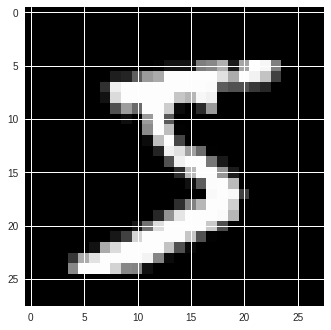

In [5]:
plt.imshow(X_train[0], cmap='gray');
print(y_train[0])

7


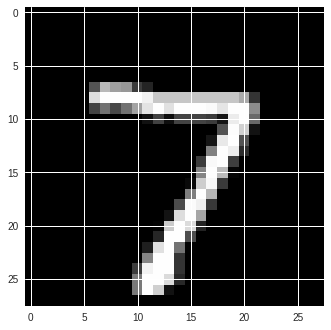

In [6]:
plt.imshow(X_test[0], cmap='gray');
print(y_test[0])

## Feature Engineering

In [7]:
# flatten images
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_val_flat = X_val.reshape((X_val.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print(X_train_flat.shape)
print(X_val_flat.shape)
print(X_test_flat.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [8]:
import keras

# one-hot encode the target
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

display(y_train_oh.shape)
display(y_train_oh[:3])
display(y_train[:3])

(50000, 10)

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

array([5, 0, 4], dtype=uint8)

## Model

In [9]:
from keras.layers import Dense, Activation
from keras.models import Sequential
import keras.backend as K

K.clear_session()

# it is a feed-forward network without loops like in RNN
model = Sequential() 

# the first layer must specify the input shape (replacing placeholders)
model.add(Dense(256, input_shape=(784,)))  

model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# you can look at all layers and parameter count
model.summary()

# now we "compile" the model specifying the loss and optimizer
model.compile(
    loss='categorical_crossentropy', # this is our cross-entropy
    optimizer='adam',
    metrics=['accuracy']  # report accuracy during training
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
Inst

In [10]:
import keras_utils

# and now we can fit the model with model.fit()
# and we don't have to write loops and batching manually as in TensorFlow
history = model.fit(
    X_train_flat, y_train_oh,
    batch_size=512, 
    epochs=40,
    validation_data=(X_val_flat, y_val_oh),
    callbacks=[keras_utils.TqdmProgressCallback()],
    verbose=0
)


Epoch 1/40
**************************************************
loss: 1.1804; acc: 0.7013; val_loss: 0.4514; val_acc: 0.8886

Epoch 2/40
**************************************************
loss: 0.3820; acc: 0.8964; val_loss: 0.2934; val_acc: 0.9175

Epoch 3/40
**************************************************
loss: 0.2918; acc: 0.9164; val_loss: 0.2496; val_acc: 0.9276

Epoch 4/40
**************************************************
loss: 0.2495; acc: 0.9268; val_loss: 0.2171; val_acc: 0.9379

Epoch 5/40
**************************************************
loss: 0.2205; acc: 0.9352; val_loss: 0.2015; val_acc: 0.9425

Epoch 6/40
**************************************************
loss: 0.1951; acc: 0.9430; val_loss: 0.1793; val_acc: 0.9486

Epoch 7/40
**************************************************
loss: 0.1748; acc: 0.9487; val_loss: 0.1624; val_acc: 0.9546

Epoch 8/40
**************************************************
loss: 0.1567; acc: 0.9543; val_loss: 0.1539; val_acc: 0.9572

Epoch 9

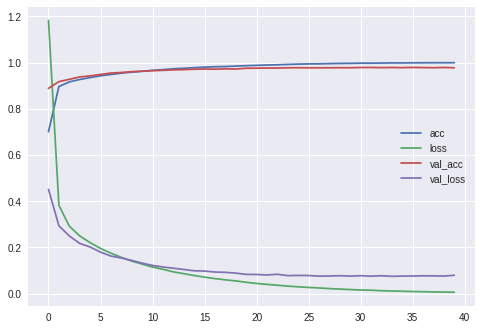

In [11]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

## Evaluation

In [12]:
result = model.evaluate(X_test_flat, y_test_oh)

display(result)
print('Accuracy: ' + str(result[1]*100.0) + ' %')

 9504/10000 [===========================>..] - ETA: 0s

[0.0771901397134381, 0.9784]

Accuracy: 97.84 %


## Here're the notes for those who want to play around here

Here are some tips on what you could do:

 * __Network size__
   * More neurons, 
   * More layers, ([docs](https://keras.io/))

   * Other nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
     

 * __Faster optimization__
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - https://keras.io/regularizers/
   
   
 * __Data augmemntation__ - getting 5x as large dataset for free is a great deal
   * https://keras.io/preprocessing/image/
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.